## Contents
* Support Vector Machine


## References
* https://scikit-learn.org/stable/modules/svm.html,  
* https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html  
* https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py




#### Example
1. imbalanced dataset 생성 및 SVM "C" 파라미터를 이용한 결과 비교  
2. non linear dataset 에 대한 kernel 선택 및 "gamma", "C" 파라미터에 따른 결과 비교  
3. iris dataset 에 대한 classfication 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics


#### 1. imbalanced data 를 생성하고, SVM 의 parameter "C" 를 조정하여 주어진 label 과 예측값과의 차이 비교해 보자.

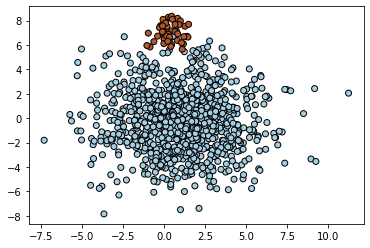

In [2]:
# generate imbalanced data
# n_samples_1 : n_samples_2 = 1000:50

n_samples_1 = 1000
n_samples_2 = 50
centers = [[1.0, 0.0], [0.0, 7.0]]
clusters_std = [2.5, 0.8]

# Generate isotropic gaussian blobs
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                 centers=centers,
                 cluster_std=clusters_std,
                 random_state=2,
                 shuffle=False)

# display sample_1 (blue) & sample (red)
plt.scatter(X[:, 0], X[:,1], cmap=plt.cm.Paired, c=y, edgecolors='k')

# split train/test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

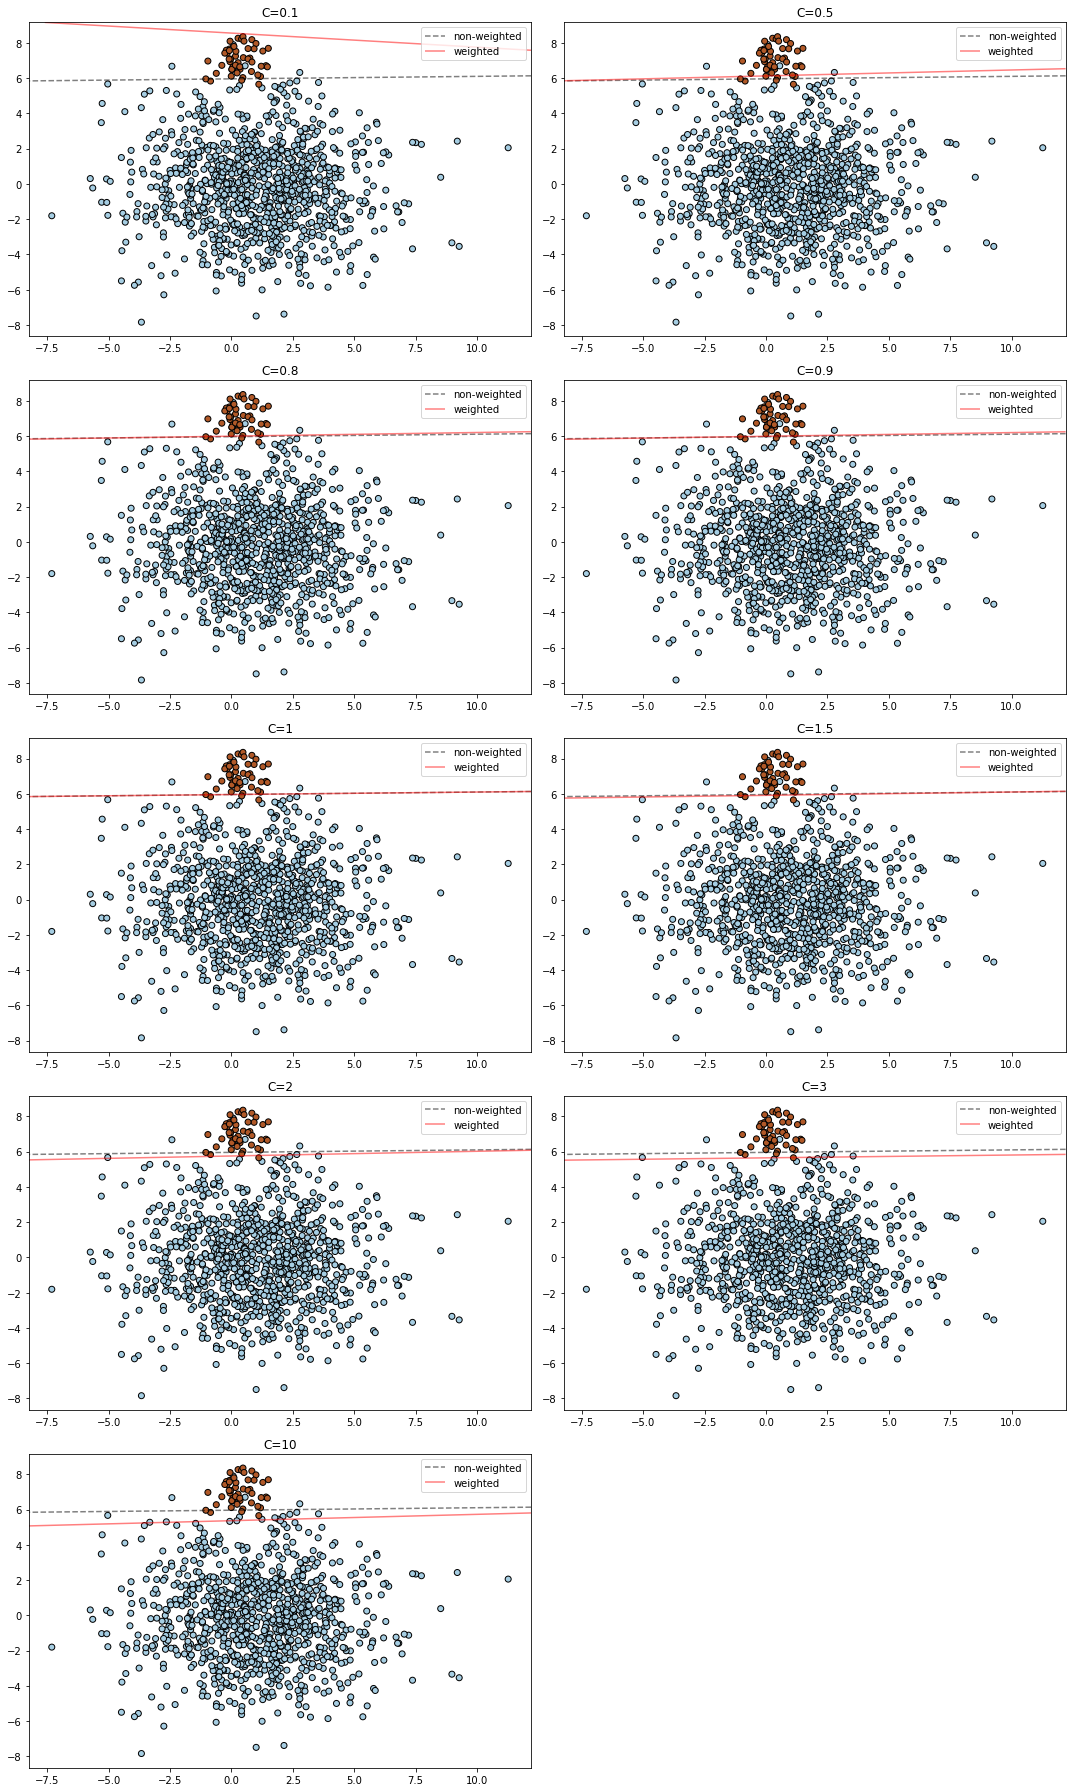

C:0.1,	train_acc:0.952	test_acc:0.952
C:0.5,	train_acc:0.988	test_acc:0.990
C:0.8,	train_acc:0.990	test_acc:0.994
C:0.9,	train_acc:0.990	test_acc:0.994
C:1,	train_acc:0.990	test_acc:0.997
C:1.5,	train_acc:0.990	test_acc:0.997
C:2,	train_acc:0.990	test_acc:0.997
C:3,	train_acc:0.989	test_acc:0.994
C:10,	train_acc:0.986	test_acc:0.981


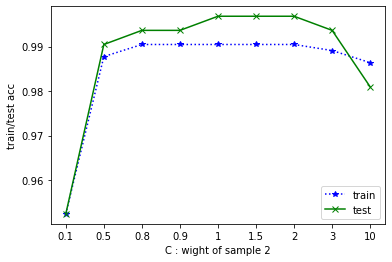

In [3]:
# SVM for reference
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

train_accs = []
test_accs = []

plt.figure(figsize=(15, 25))

# C
Cs = [0.1, 0.5, 0.8, 0.9, 1, 1.5, 2, 3, 10]


for i, C in enumerate(Cs):

    # SVM parameters setting : linear, C of sample_2
    lclf = svm.SVC(kernel='linear', class_weight={1:C})
    lclf.fit(X_train, y_train)

    # prediction
    y_train_pred = lclf.predict(X_train)
    y_test_pred = lclf.predict(X_test)

    # accuracy y & y (predict)
    train_acc = metrics.accuracy_score(y_train, y_train_pred)
    test_acc = metrics.accuracy_score(y_test, y_test_pred)
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    
    # figure size setting
    #plt.figure(figsize=(8, 4))
    # visualization
    plt.subplot(len(Cs)//2+1, 2,i+1)
    plt.scatter(X[:, 0], X[:,1], cmap=plt.cm.Paired, c=y, edgecolors='k')

    # figure setting
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 2)
    yy = np.linspace(ylim[0], ylim[1], 2)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # draw hyper plane between sample 1 and sample 2
    # C = 1.0 (for reference)
    Z = clf.decision_function(xy).reshape(XX.shape)
    a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['--'])

    # C = [0.1, 1, 2, 3, 5, 10]
    Z = lclf.decision_function(xy).reshape(XX.shape)
    b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])
    plt.title("C={}".format(C))

    plt.legend([a.collections[0], b.collections[0]], ["non-weighted", "weighted"], loc='upper right')
    
plt.tight_layout()    
plt.show()

# train & test accurcay
plt.plot(train_accs, 'b*:')
plt.plot(test_accs, 'gx-')
plt.legend(['train', 'test'])
plt.xticks(range(len(Cs)), Cs)
plt.xlabel("C : wight of sample 2")
plt.ylabel("train/test acc")

for i in range(len(Cs)):
    print("C:{},\ttrain_acc:{:.3f}\ttest_acc:{:.3f}".format(Cs[i], train_accs[i], test_accs[i]))


#### 2. circle dataset 에 rfb kernel 을 적용하고, parameter "C", "gamma" 를 이용하여 accuracy 와의 관계를 확인해 보자.

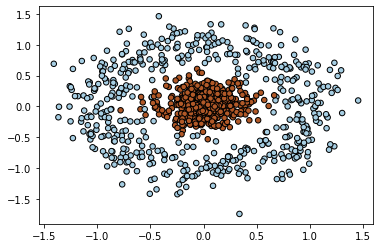

In [4]:
# generate circle dataset
X, y = datasets.make_circles(n_samples=1000, noise=0.2, factor=0.05)

# display
plt.scatter(X[:,0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired, edgecolors='k')

# split train/test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

/home/meisteri/anaconda3/envs/test1/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: No contour levels were found within the data range.


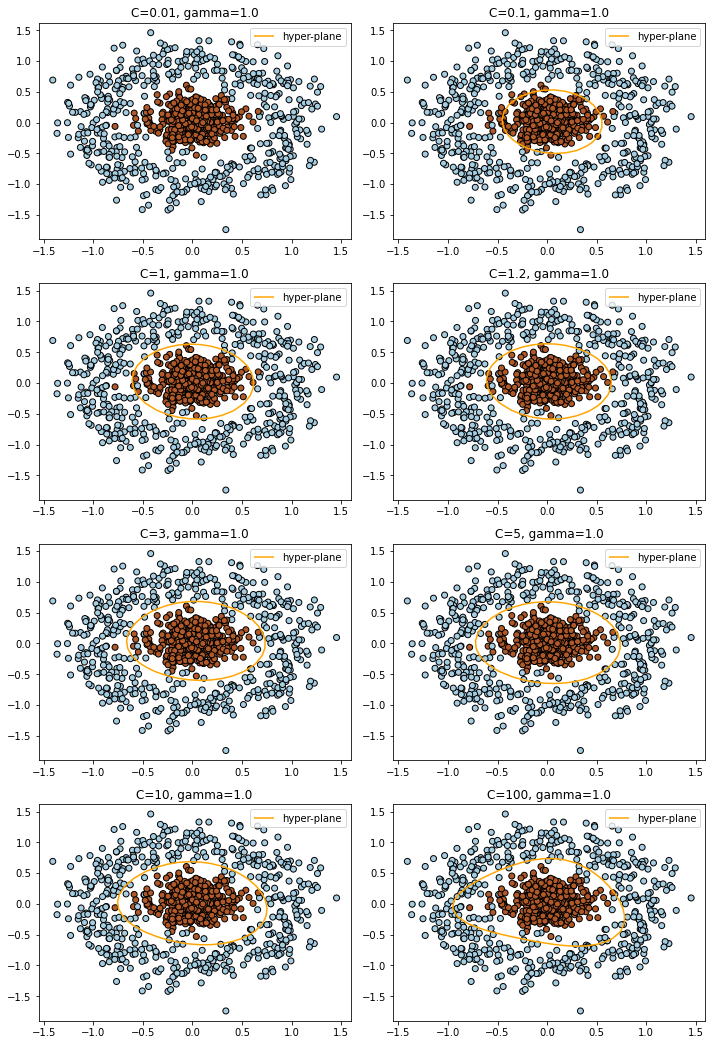

C:0.01,	train_acc:0.500	test_acc:0.500
C:0.1,	train_acc:0.973	test_acc:0.980
C:1,	train_acc:0.990	test_acc:0.983
C:1.2,	train_acc:0.990	test_acc:0.980
C:3,	train_acc:0.983	test_acc:0.980
C:5,	train_acc:0.981	test_acc:0.973
C:10,	train_acc:0.981	test_acc:0.970
C:100,	train_acc:0.949	test_acc:0.943


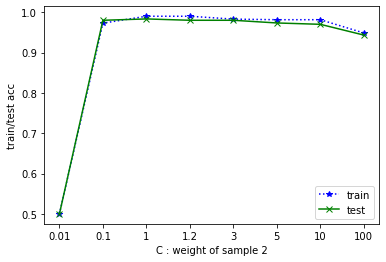

In [5]:
train_accs = []
test_accs = []

# Cs
Cs = [0.01, 0.1, 1, 1.2, 3, 5, 10, 100]
gamma=1.0

plt.figure(figsize=(10, 18))

for i, C in enumerate(Cs):
    
    # racial basis kernel 
    rbfclf = svm.SVC(kernel='rbf', class_weight={1:C}, gamma=gamma, random_state=1)
    rbfclf.fit(X_train, y_train)

    # prediction
    y_train_pred = rbfclf.predict(X_train)
    y_test_pred = rbfclf.predict(X_test)

    # accuracy score
    train_acc = metrics.accuracy_score(y_train, y_train_pred)
    test_acc = metrics.accuracy_score(y_test, y_test_pred)

    train_accs.append(train_acc)
    test_accs.append(test_acc)

    # subplots
    plt.subplot(len(Cs)//2+1, 2,i+1)
    # visualization
    plt.scatter(X[:, 0], X[:,1], cmap=plt.cm.Paired, c=y, edgecolors='k')

    # figure setting
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # draw hyper-plane
    Z = rbfclf.decision_function(xy).reshape(XX.shape)
    a = ax.contour(XX, YY, Z, colors='orange', levels=[0], alpha=1.0, linestyles=['-'])
    plt.title("C={}, gamma={}".format(C, gamma))

    plt.legend([a.collections[0]], ["hyper-plane"], loc='upper right')
    
plt.tight_layout()
plt.show()

# accuracy graph
plt.plot(train_accs, 'b*:')
plt.plot(test_accs, 'gx-')
plt.legend(['train', 'test'])
plt.xticks(range(len(Cs)), Cs)
plt.xlabel("C : weight of sample 2")
plt.ylabel("train/test acc")

for i in range(len(Cs)):
    print("C:{},\ttrain_acc:{:.3f}\ttest_acc:{:.3f}".format(Cs[i], train_accs[i], test_accs[i]))


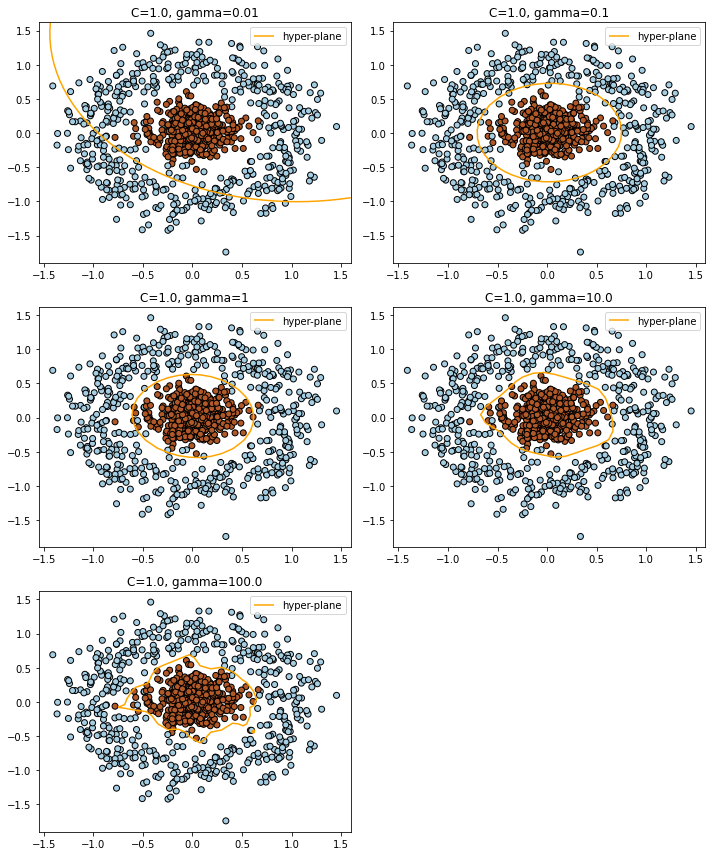

gamma:0.01,	train_acc:0.653	test_acc:0.660
gamma:0.1,	train_acc:0.976	test_acc:0.960
gamma:1,	train_acc:0.990	test_acc:0.983
gamma:10.0,	train_acc:0.993	test_acc:0.980
gamma:100.0,	train_acc:0.997	test_acc:0.987


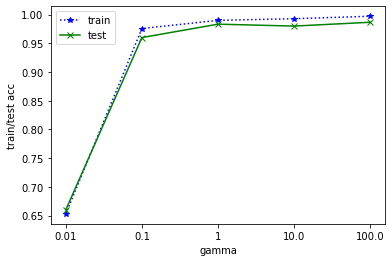

In [6]:
# SVM  

train_accs = []
test_accs = []

C = 1.0
gammas = [0.01, 0.1, 1, 10.0, 100.0]

plt.figure(figsize=(10, 12))

for i, gamma in enumerate(gammas):

        # racial basis kernel
        rbfclf = svm.SVC(kernel='rbf', class_weight={1:C}, gamma=gamma, random_state=1)
        rbfclf.fit(X_train, y_train)

        # prediction
        y_train_pred = rbfclf.predict(X_train)
        y_test_pred = rbfclf.predict(X_test)

        # accuracy
        train_acc = metrics.accuracy_score(y_train, y_train_pred)
        test_acc = metrics.accuracy_score(y_test, y_test_pred)

        train_accs.append(train_acc)
        test_accs.append(test_acc)


        # subplots
        plt.subplot(len(gammas)//2+1, 2, i+1)
        # visualization
        plt.scatter(X[:, 0], X[:,1], cmap=plt.cm.Paired, c=y, edgecolors='k')

        # figure setting
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()        
        
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T

        # draw hyper plane
        Z = rbfclf.decision_function(xy).reshape(XX.shape)
        a = ax.contour(XX, YY, Z, colors='orange', levels=[0], alpha=1.0, linestyles=['-'])
        plt.title("C={}, gamma={}".format(C, gamma))

        plt.legend([a.collections[0]], ["hyper-plane"], loc='upper right')
       
plt.tight_layout()
plt.show()

# accuracy graph
plt.plot(train_accs, 'b*:')
plt.plot(test_accs, 'gx-')
plt.legend(['train', 'test'])
plt.xticks(range(len(gammas)), gammas)
plt.xlabel("gamma")
plt.ylabel("train/test acc")


for i in range(len(gammas)):
    print("gamma:{},\ttrain_acc:{:.3f}\ttest_acc:{:.3f}".format(gammas[i], train_accs[i], test_accs[i]))


#### 3. iris dataset 에 대해 SVM 을 이용한 classification 을 적용해 보자.

In [7]:
# load iris data 
iris = datasets.load_iris()

iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

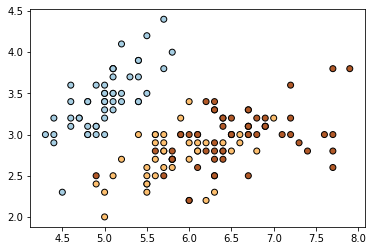

In [8]:

X = iris.data[:, :2]
y = iris.target

# display
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# split train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

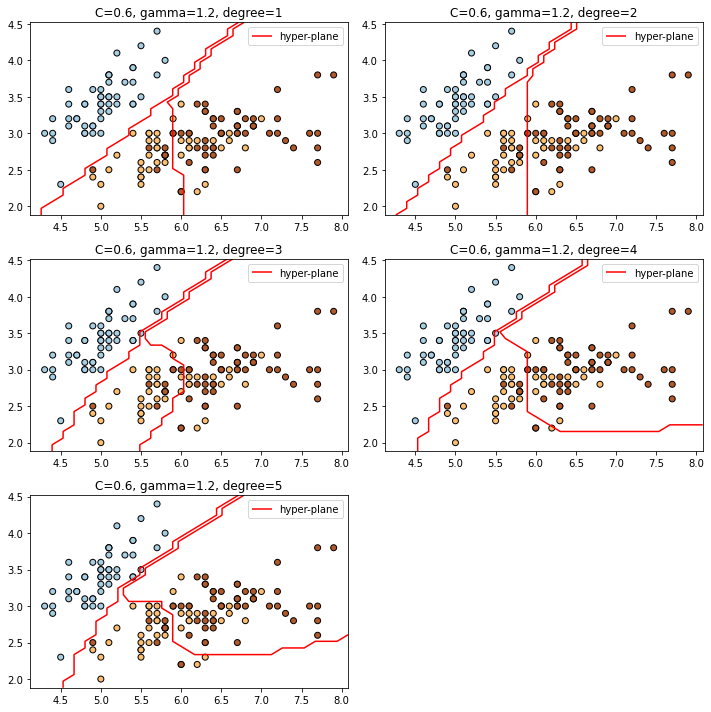

C:0.6,	gamma:1.2,	degree:1,	train_acc:0.800	test_acc:0.778
C:0.6,	gamma:1.2,	degree:2,	train_acc:0.800	test_acc:0.778
C:0.6,	gamma:1.2,	degree:3,	train_acc:0.819	test_acc:0.756
C:0.6,	gamma:1.2,	degree:4,	train_acc:0.800	test_acc:0.800
C:0.6,	gamma:1.2,	degree:5,	train_acc:0.810	test_acc:0.778


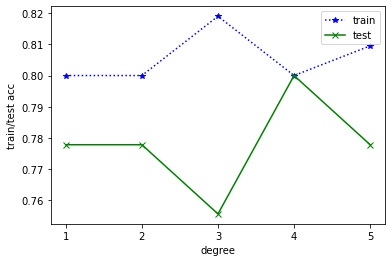

In [9]:
train_accs = []
test_accs = []

# parameters
C =0.6
gamma = 1.2
degrees = [1, 2, 3, 4, 5]

plt.figure(figsize=(10, 10))

for i, degree in enumerate(degrees):

        # kernel : "poly"
        polyclf = svm.SVC(kernel='poly', class_weight={1:C}, gamma=gamma, degree=degree, random_state=1)
        # training
        polyclf.fit(X_train, y_train)

        # prediction
        y_train_pred = polyclf.predict(X_train)
        y_test_pred = polyclf.predict(X_test)

        # accuracy
        train_acc = metrics.accuracy_score(y_train, y_train_pred)
        test_acc = metrics.accuracy_score(y_test, y_test_pred)

        train_accs.append(train_acc)
        test_accs.append(test_acc)

        # subplot 
        plt.subplot(len(gammas)//2+1, 2, i+1)

        # visualization
        plt.scatter(X[:, 0], X[:,1], cmap=plt.cm.Paired, c=y, edgecolors='k')

        # figure setting
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()        
        
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T

        # draw hyper-plane
        Z = polyclf.predict(np.c_[xy])
        Z = Z.reshape(XX.shape)

        a = ax.contour(XX, YY, Z, colors=['r', 'r'], levels=[0, 1], alpha=1.0, linestyles=['-'])
        plt.title("C={}, gamma={}, degree={}".format(C, gamma, degree))

        plt.legend([a.collections[0]], ["hyper-plane"], loc='upper right')
        
plt.tight_layout()
plt.show()

# draw graph
plt.plot(train_accs, 'b*:')
plt.plot(test_accs, 'gx-')
plt.legend(['train', 'test'])
plt.xticks(range(len(degrees)), degrees)
plt.xlabel("degree")
plt.ylabel("train/test acc")


for i in range(len(degrees)):
    print("C:{},\tgamma:{},\tdegree:{},\ttrain_acc:{:.3f}\ttest_acc:{:.3f}".format(C, gamma, degrees[i], train_accs[i], test_accs[i]))



In [10]:
# all features
X = iris.data[:, [2, 3]] # 0 ~ 3
y = iris.target

# split train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)


C = 1.5
gamma = 1.2
degree = 4

# kernel : "poly"
polyclf = svm.SVC(kernel='poly', class_weight={1:C}, gamma=gamma, degree=degree, random_state=1)
# training
polyclf.fit(X_train, y_train)

# prediction
y_train_pred = polyclf.predict(X_train)
y_test_pred = polyclf.predict(X_test)

# accuracy
train_acc = metrics.accuracy_score(y_train, y_train_pred)
test_acc = metrics.accuracy_score(y_test, y_test_pred)


print("train accuracy: ", train_acc)
print("test accuracy: ", test_acc)

train accuracy:  0.9619047619047619
test accuracy:  1.0
